# Multiclass Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Walk through 10 classes of food in image data
import os
for dirpath, dirnames, filenames in os.walk("Data\\10_food_classes_all_data\\10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Data\10_food_classes_all_data\10_food_classes_all_data'.
There are 10 directories and 0 images in 'Data\10_food_classes_all_data\10_food_classes_all_data\test'.
There are 0 directories and 250 images in 'Data\10_food_classes_all_data\10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in 'Data\10_food_classes_all_data\10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in 'Data\10_food_classes_all_data\10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in 'Data\10_food_classes_all_data\10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in 'Data\10_food_classes_all_data\10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in 'Data\10_food_classes_all_data\10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in 'Data\10_food_classes_all_data\10_food_classes_all_d

In [3]:
# Setup the train and test directories
train_dir = "Data/10_food_classes_all_data/10_food_classes_all_data/train/"
test_dir = "Data/10_food_classes_all_data/10_food_classes_all_data/test/"

In [4]:
# Let's get the sub directories (these are our class names)
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Visualize our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    #Get a random image path
    random_images = random.sample(os.listdir(target_folder), 1)
    print(random_images)

    #Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "\\" + random_images[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # Show the shape of the image

    return img

['833264.jpg']
Image shape: (512, 307, 3)


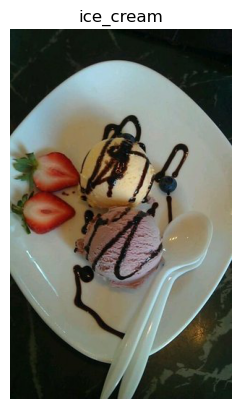

In [6]:
# Visualize our image
img = view_random_image(target_dir=train_dir,
                       target_class = random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras import Sequential

In [9]:
model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # Change to have 10 neurons and use the softmax activation function
])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
               optimizer = Adam(),
               metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 103s 433ms/step - loss: 2.0712 - accuracy: 0.2661 - val_loss: 1.9096 - val_accuracy: 0.3316
Epoch 2/5
235/235 [==============================] - 66s 280ms/step - loss: 1.7983 - accuracy: 0.3887 - val_loss: 1.7759 - val_accuracy: 0.3808
Epoch 3/5
235/235 [==============================] - 64s 271ms/step - loss: 1.5162 - accuracy: 0.5005 - val_loss: 1.8002 - val_accuracy: 0.3852
Epoch 4/5
235/235 [==============================] - 66s 280ms/step - loss: 1.0670 - accuracy: 0.6549 - val_loss: 2.2383 - val_accuracy: 0.3244
Epoch 5/5
235/235 [==============================] - 65s 275ms/step - loss: 0.5417 - accuracy: 0.8337 - val_loss: 2.8042 - val_accuracy: 0.3204


## 5. Evaluate the model

In [10]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 2.8042 - accuracy: 0.3204


[2.804219961166382, 0.3203999996185303]

In [11]:
# Plot the validation and training curves separatly
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    #Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    #Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

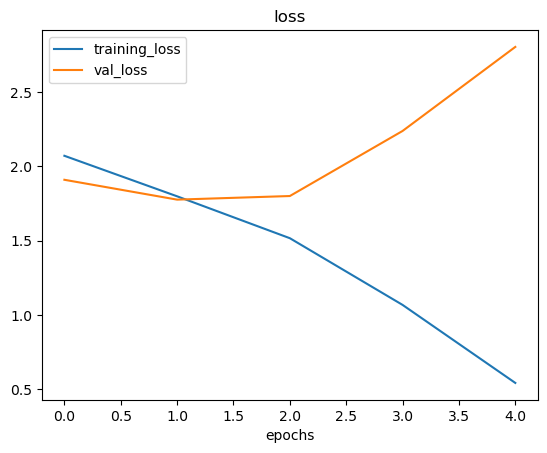

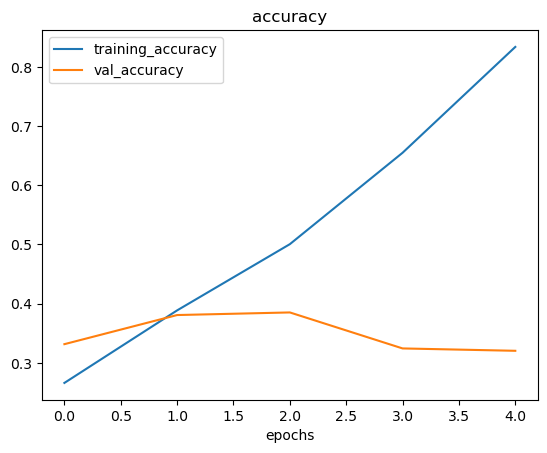

In [12]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_1)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

## 5. Adjust the model hyperparamters (to beat the baseline/ reduce overfitting)

- **Get more data** - having more data gives a model more opportunity to learn diverse patterns
- **Simply the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: Reduce # of layers or reduce # hidden units in layers
- **Use Data augmentation** - data augmentation manipulates the training data in such a way to add more diverdity to it (without altering the original data)

In [13]:
# How about we try and simplify the model first?
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [14]:
# Let's try to remove 2 Conv2D in the model..
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch= len(train_data),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 243ms/step - loss: 2.3121 - accuracy: 0.1979 - val_loss: 2.0040 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 57s 244ms/step - loss: 1.9180 - accuracy: 0.3413 - val_loss: 1.9740 - val_accuracy: 0.2872
Epoch 3/5
235/235 [==============================] - 54s 228ms/step - loss: 1.7081 - accuracy: 0.4288 - val_loss: 2.0048 - val_accuracy: 0.2896
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 1.3630 - accuracy: 0.5532 - val_loss: 2.1899 - val_accuracy: 0.2784
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.9716 - accuracy: 0.6960 - val_loss: 2.4623 - val_accuracy: 0.2624


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

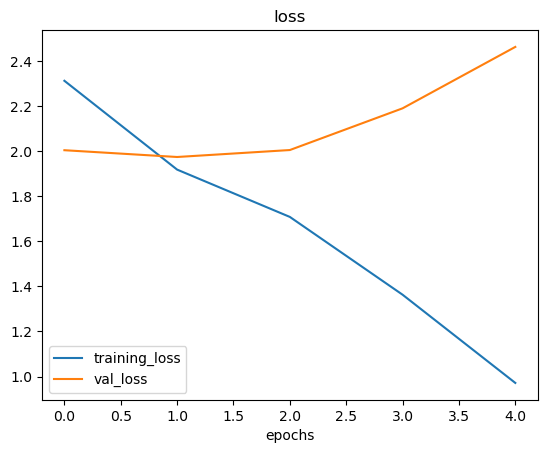

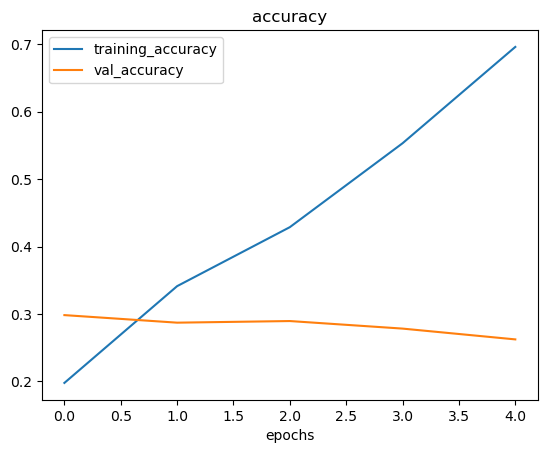

In [16]:
# Check out the loss curves
plot_loss_curves(history_2)

Looks like our 'simplifying the model' experiment didn't work.. 
the accuracy went down and overfitting continued...

How about **data augmentation?**

### Trying to reduce overfitting with data augmentation

Ideally, we want to:
- Reduce overfitting (get the train and validation loss curves closer)
- Improve validation accuracy

In [17]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224, 224),
                                                                      batch_size = 32,
                                                                      class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [18]:
# Let's create another model but this time we'll fit it on the augmented training data
model_3 = tf.keras.models.clone_model(model_2)

#compile the cloned model ( using the same setup as previous models)
model_3.compile(loss='categorical_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

In [19]:
history_3 = model_3.fit(train_datagen_augmented,
                       epochs=5,
                       steps_per_epoch= len(train_datagen_augmented),
                       validation_data= test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 97s 412ms/step - loss: 2.1775 - accuracy: 0.2192 - val_loss: 1.9656 - val_accuracy: 0.3084
Epoch 2/5
235/235 [==============================] - 99s 419ms/step - loss: 2.0445 - accuracy: 0.2779 - val_loss: 1.8854 - val_accuracy: 0.3516
Epoch 3/5
235/235 [==============================] - 136s 580ms/step - loss: 1.9932 - accuracy: 0.3024 - val_loss: 1.8176 - val_accuracy: 0.3744
Epoch 4/5
235/235 [==============================] - 132s 561ms/step - loss: 1.9627 - accuracy: 0.3196 - val_loss: 1.8161 - val_accuracy: 0.3792
Epoch 5/5
235/235 [==============================] - 100s 425ms/step - loss: 1.9300 - accuracy: 0.3315 - val_loss: 1.8376 - val_accuracy: 0.3784


In [20]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [21]:
model_3.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 1.8376 - accuracy: 0.3784


[1.837618350982666, 0.3783999979496002]

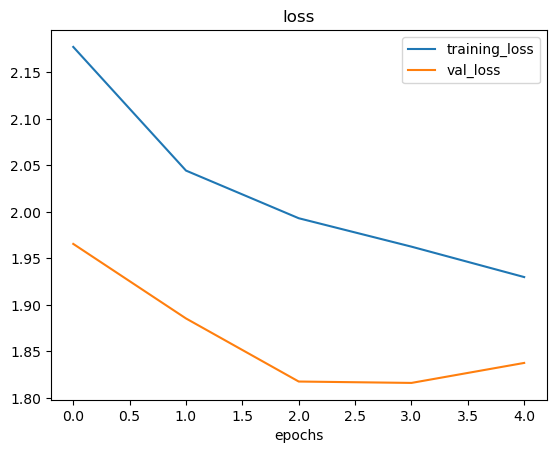

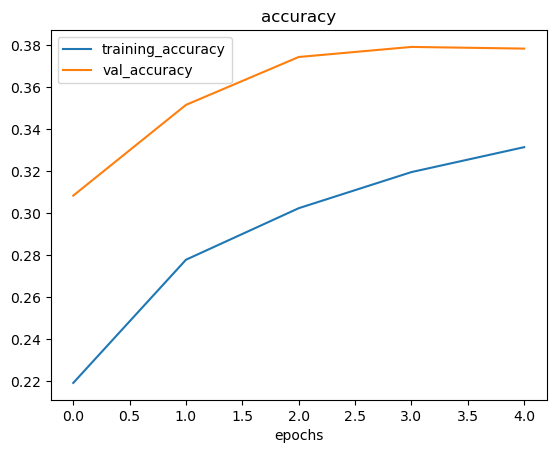

In [22]:
plot_loss_curves(history_3)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see futher improvements.

## 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture(increasing layers/hidden units)
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparamters in our ImageDataGenerator Instance)
- Training for longer (e.g. 10 epochs instead of 5 epochs)
- Try **Transfer learning**

In [23]:
model_4 = Sequential([
    Conv2D(50, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(50, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(50, 3, activation='relu'),
    Conv2D(50, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(50, 3, activation='relu'),
    Conv2D(50, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(50, 3, activation='relu'),
    Conv2D(50, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_4.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history_4 = model_4.fit(train_datagen_augmented,
                       epochs=20,
                       steps_per_epoch= len(train_datagen_augmented),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/20
235/235 [==============================] - 254s 1s/step - loss: 2.2402 - accuracy: 0.1539 - val_loss: 2.1226 - val_accuracy: 0.2168
Epoch 2/20
235/235 [==============================] - 257s 1s/step - loss: 2.1317 - accuracy: 0.2245 - val_loss: 2.0824 - val_accuracy: 0.2472
Epoch 3/20
235/235 [==============================] - 233s 989ms/step - loss: 2.0508 - accuracy: 0.2660 - val_loss: 1.8650 - val_accuracy: 0.3488
Epoch 4/20
235/235 [==============================] - 250s 1s/step - loss: 1.9739 - accuracy: 0.3072 - val_loss: 1.8245 - val_accuracy: 0.3512
Epoch 5/20
235/235 [==============================] - 230s 978ms/step - loss: 1.9440 - accuracy: 0.3109 - val_loss: 1.7354 - val_accuracy: 0.4016
Epoch 6/20
235/235 [==============================] - 230s 977ms/step - loss: 1.8790 - accuracy: 0.3544 - val_loss: 1.7573 - val_accuracy: 0.3932
Epoch 7/20
235/235 [==============================] - 237s 1s/step - loss: 1.8211 - accuracy: 0.3685 - val_loss: 1.6605 - val_accurac

In [24]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 50)      1400      
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 50)      22550     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 50)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 50)      22550     
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 50)      22550     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 50)       0         
 2D)                                                  

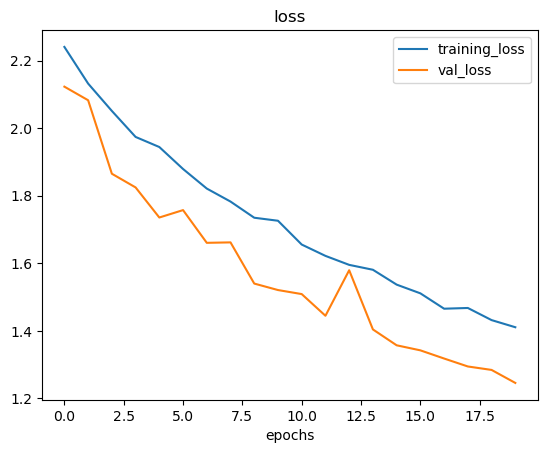

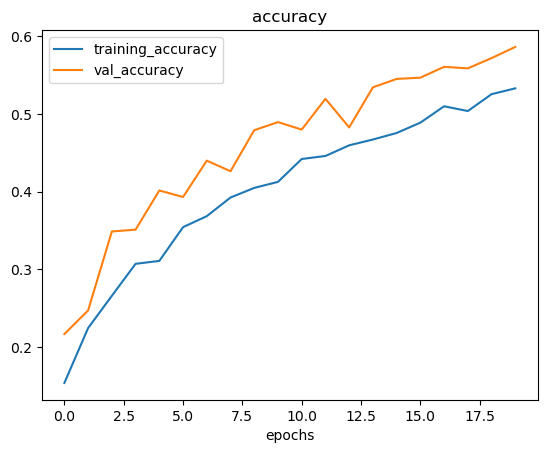

In [25]:
plot_loss_curves(history_4)

In [45]:
model_5 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

# Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

# Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

# Block 4
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

    # Fully connected layers
    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_5 = model_5.fit(train_datagen_augmented,
                       epochs=20,
                       steps_per_epoch= len(train_datagen_augmented),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/20
235/235 [==============================] - 477s 2s/step - loss: 2.2580 - accuracy: 0.1467 - val_loss: 2.1484 - val_accuracy: 0.1992
Epoch 2/20
235/235 [==============================] - 475s 2s/step - loss: 2.1532 - accuracy: 0.2085 - val_loss: 2.1228 - val_accuracy: 0.2492
Epoch 3/20
235/235 [==============================] - 465s 2s/step - loss: 2.0741 - accuracy: 0.2539 - val_loss: 1.9461 - val_accuracy: 0.3216
Epoch 4/20
235/235 [==============================] - 451s 2s/step - loss: 2.0152 - accuracy: 0.2821 - val_loss: 1.8015 - val_accuracy: 0.3640
Epoch 5/20
235/235 [==============================] - 496s 2s/step - loss: 1.9384 - accuracy: 0.3264 - val_loss: 1.7257 - val_accuracy: 0.3940
Epoch 6/20
235/235 [==============================] - 476s 2s/step - loss: 1.8724 - accuracy: 0.3564 - val_loss: 1.6921 - val_accuracy: 0.4376
Epoch 7/20
235/235 [==============================] - 485s 2s/step - loss: 1.8400 - accuracy: 0.3636 - val_loss: 1.6615 - val_accuracy: 0.4204

In [48]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_62 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 56, 56, 256)      

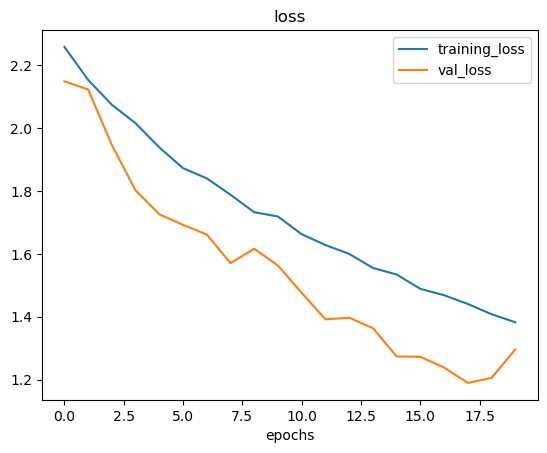

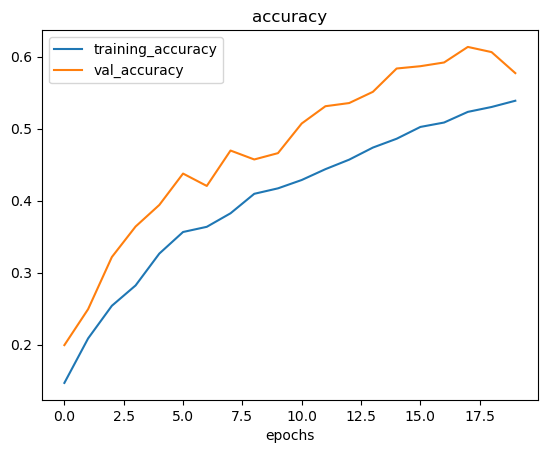

In [50]:
plot_loss_curves(history_5)

In [35]:
model_6 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2), strides=(2, 2)),

# Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2), strides=(2, 2)),

# Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2), strides=(2, 2)),

# Block 4
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2), strides=(2, 2)),

    # Fully connected layers
    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_6 = model_6.fit(train_datagen_augmented,
                       epochs=20,
                       steps_per_epoch= len(train_datagen_augmented),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/20
235/235 [==============================] - 320s 1s/step - loss: 2.2180 - accuracy: 0.1761 - val_loss: 2.0412 - val_accuracy: 0.2688
Epoch 2/20
235/235 [==============================] - 325s 1s/step - loss: 2.1015 - accuracy: 0.2356 - val_loss: 1.9852 - val_accuracy: 0.2980
Epoch 3/20
235/235 [==============================] - 321s 1s/step - loss: 2.0464 - accuracy: 0.2711 - val_loss: 1.8978 - val_accuracy: 0.3176
Epoch 4/20
235/235 [==============================] - 320s 1s/step - loss: 1.9851 - accuracy: 0.3011 - val_loss: 1.9189 - val_accuracy: 0.3268
Epoch 5/20
235/235 [==============================] - 320s 1s/step - loss: 1.9090 - accuracy: 0.3329 - val_loss: 1.7266 - val_accuracy: 0.4192
Epoch 6/20
235/235 [==============================] - 321s 1s/step - loss: 1.8479 - accuracy: 0.3600 - val_loss: 1.8097 - val_accuracy: 0.3812
Epoch 7/20
235/235 [==============================] - 325s 1s/step - loss: 1.7915 - accuracy: 0.3923 - val_loss: 1.6469 - val_accuracy: 0.4468

In [51]:
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 28, 28, 256)     

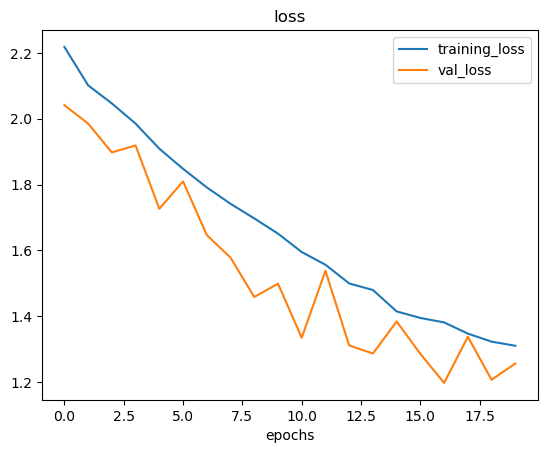

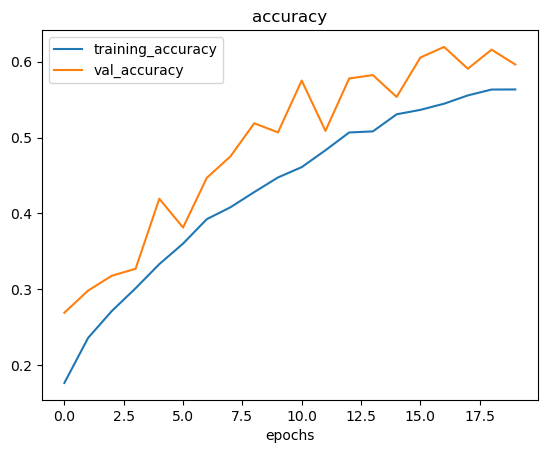

In [52]:
plot_loss_curves(history_6)

In [34]:
model_7 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),

# Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

# Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

    # Fully connected layers
    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_7 = model_7.fit(train_datagen_augmented,
                       epochs=20,
                       steps_per_epoch= len(train_datagen_augmented),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/20
235/235 [==============================] - 269s 1s/step - loss: 2.1945 - accuracy: 0.2059 - val_loss: 2.0365 - val_accuracy: 0.2952
Epoch 2/20
235/235 [==============================] - 246s 1s/step - loss: 2.0575 - accuracy: 0.2708 - val_loss: 1.9068 - val_accuracy: 0.3332
Epoch 3/20
235/235 [==============================] - 240s 1s/step - loss: 1.9829 - accuracy: 0.3053 - val_loss: 1.9036 - val_accuracy: 0.3568
Epoch 4/20
235/235 [==============================] - 240s 1s/step - loss: 1.9538 - accuracy: 0.3215 - val_loss: 1.7583 - val_accuracy: 0.4020
Epoch 5/20
235/235 [==============================] - 238s 1s/step - loss: 1.8945 - accuracy: 0.3480 - val_loss: 1.7079 - val_accuracy: 0.4140
Epoch 6/20
235/235 [==============================] - 239s 1s/step - loss: 1.8376 - accuracy: 0.3684 - val_loss: 1.6470 - val_accuracy: 0.4384
Epoch 7/20
235/235 [==============================] - 238s 1s/step - loss: 1.8214 - accuracy: 0.3744 - val_loss: 1.6697 - val_accuracy: 0.4328

In [53]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 28, 28, 256)     

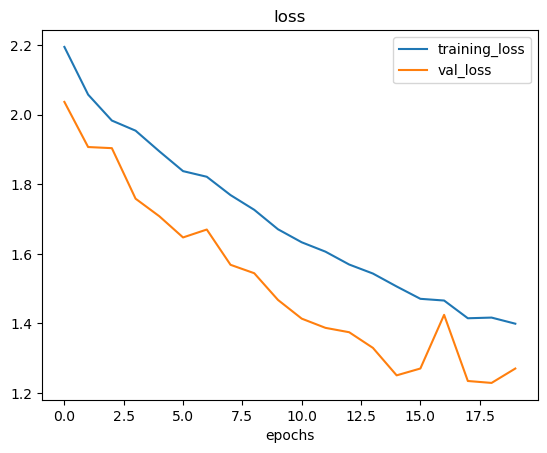

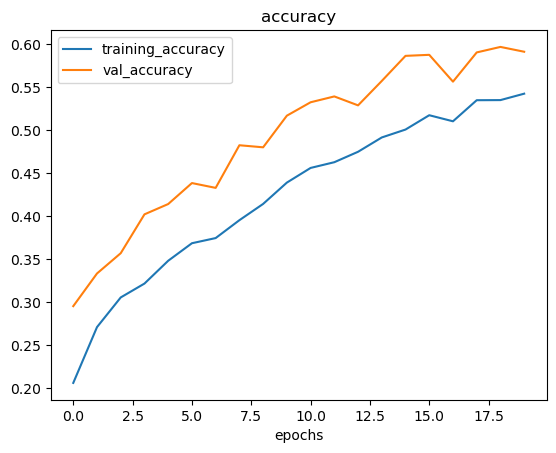

In [54]:
plot_loss_curves(history_7)

## Making a prediction with our trained model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [39]:
# Create a functiont to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename and turn it into a tensor and reshapes 
    it to (img_shape, img_shape, color_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    #Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image and (get all values between 0 and 1)
    img = img/255
    return img

In [40]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    #Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Add in logic for multi-class & get pred_class name 
    if len(pred[0]) > 1:
        pred_class = class_names[pred.argmax()]
    else:
        # Get the predicted class
        pred_class = class_names[int(tf.round(pred[0][0]))]

    #Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 301ms/step


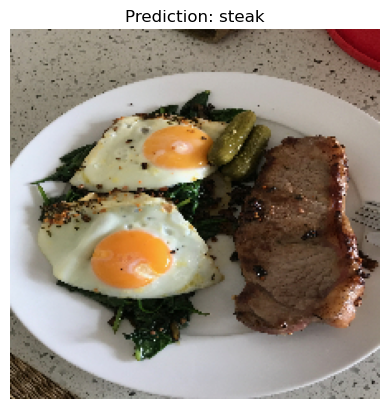

In [46]:
# Make a prediction using model_3
pred_and_plot(model_6, 'Custom_data/03-steak.jpeg', class_names = class_names)

1/1 [==============================] - 0s 45ms/step


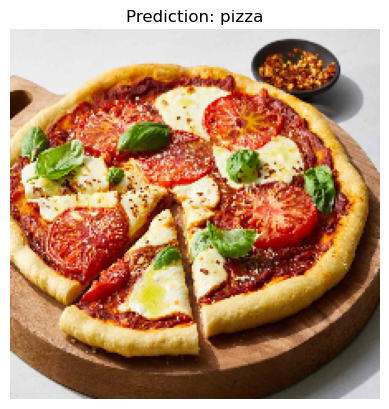

In [47]:
pred_and_plot(model_6, 'Custom_data/Pizza.jpg', class_names = class_names)

1/1 [==============================] - 0s 50ms/step


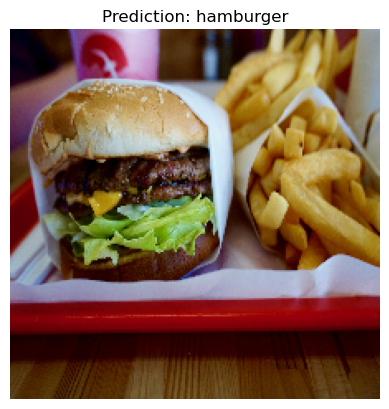

In [43]:
pred_and_plot(model_7, 'Custom_data/03-hamburger.jpeg', class_names = class_names)

1/1 [==============================] - 0s 51ms/step


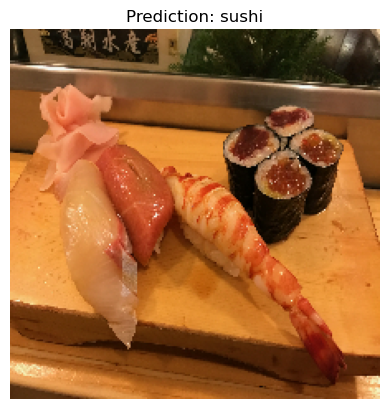

In [44]:
pred_and_plot(model_7, 'Custom_data/03-sushi.jpeg', class_names = class_names)

### Saving and loading the model

In [55]:
# save the model
model_6.save('saved_trained_model')

INFO:tensorflow:Assets written to: saved_trained_model\assets


INFO:tensorflow:Assets written to: saved_trained_model\assets


In [57]:
# Load in a trained model
loaded_model = tf.keras.models.load_model('saved_trained_model')
loaded_model.evaluate(test_data)

79/79 [==============================] - 29s 350ms/step - loss: 1.2567 - accuracy: 0.5964


[1.2566595077514648, 0.5963999629020691]

In [59]:
# Compare our loaded model to our existing model
model_6.evaluate(test_data)

79/79 [==============================] - 25s 308ms/step - loss: 1.2567 - accuracy: 0.5964


[1.2566592693328857, 0.5963999629020691]